# Further Data Analysis and Visualization
### Los Angeles County Displacement Typologies and LEHD Data on Employment Trends near Joint Development Sites

Building from my first round of analysis, I merged my Urban Displacement Project (UDP) typology data with the Los Angeles County Census tract shapefile to create basic visualizations of the neighborhood change statuses of tracts across Los Angeles County. I also plotted the coordinates of completed joint development sites over a map of LA County tracts. As a reminder, a more complete visual analysis of neighborhood change, the Metro transit system, and joint development sites at various stages of completion can be found at https://tinyurl.com/wxlpdnc.

I then turned to the OnTheMap interface of the Longitudinal Employer-Household Dynamics (LEHD) dataset, which can be accessed at https://onthemap.ces.census.gov. Using their "Import Geography" Feature, I constructed 0.1-mile polygons around the lat/lon coordinates of a set of completed JD sites and collected employment data (all jobs of all workers who live within the area) from each buffered zone for the period from three years before project completion to three years after. (I therefore only included sites whose seven-year  periods before, during, and after construction completion aligned with the available LEHD data from 2004-2017.) I then collected comparable data from the Census tracts containing this set of JD sites, and from Los Angeles County as a whole. These datasets formed the basis of several visualizations aiming to assess the extent to which JD projects have brought access to economic opportunity for their residents, compared with broader economic trends in their neighborhoods and region.

## 1. Visualizing Tract-Level Neighborhood Change Typologies in LA County

Using the tract-level UDP typologies that I explored in my initial analysis, I merged a CSV showing the neighborhood change typology of each Census tract in Los Angeles County with a TIGER/LINE shapefile of the tracts. I created basic maps of the tracts and their typologies in Geoplot.

In [2]:
#Load Los Angeles County Census Tracts

import requests
import geopandas as gpd

#Starting with all California Census Tracts
url = 'https://www2.census.gov/geo/tiger/TIGER2010/TRACT/2010/tl_2010_06_tract10.zip'

with open('tl_2010_06_tract10.zip', 'wb') as f:
    r = requests.get(url)
    f.write(r.content)

tracts = gpd.read_file('zip://tl_2010_06_tract10.zip')

#Filter to only include Los Angeles County tracts

los_angeles_tracts = tracts.loc[tracts.COUNTYFP10 == '037']

#Please refer to the initial analysis for basic exploration of this dataset

In [3]:
#Merge LA County Census Tracts with UDP Typology Data

import pandas as pd

#Load UDP typologies
typologies = pd.read_csv('Los Angeles_typology_output.csv')
#Please refer to the initial analysis for basic exploration of this dataset

#Remove the tracts with typologies labeled "[]"" (data unavailable) before merging

todrop = typologies[typologies['typ_cat'] == '[]'].index
typologies = typologies.drop(todrop)

typologies.groupby('typ_cat').describe()

/srv/app/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (208,209) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


ARE                                       ARG          ...       \
          count mean  std  min  25%  50%  75%  max  count mean     ...        
typ_cat                                                            ...        
['ARE']   387.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  387.0  0.0     ...        
['ARG']    15.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   15.0  1.0     ...        
['AdvG']   12.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   12.0  0.0     ...        
['BE']     85.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   85.0  0.0     ...        
['EOG']    39.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   39.0  0.0     ...        
['OD']     56.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   56.0  0.0     ...        
['SAE']   402.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  402.0  0.0     ...        
['SLI']   672.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  672.0  0.0     ...        
['SMMI']  622.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  622.0  0.0     ...        

         white_17         white_90                                        \
              75%     max    count         mean          std         min   
typ_cat                                                                    
['ARE']   1795.50  5557.0    387.0  1985.472254  1328.823887    4.192682   
['ARG']    692.50  1551.0     15.0   847.576273  1103.035955   44.000000   
['AdvG']   675.00  1451.0     12.0  1116.002707   848.519392  147.922625   
['BE']    1596.00  4277.0     85.0  1449.720928  1170.367409   32.794683   
['EOG']    461.00  2018.0     39.0   556.897323   639.802056   21.180763   
['OD']     660.50  2984.0     56.0   782.932879   830.062486   30.211556   
['SAE']   3186.25  6751.0    402.0  2785.517501  1363.947758   61.457639   
['SLI']    440.50  4873.0    672.0   621.143200   811.423037    0.000000   
['SMMI']  1894.00  5401.0    622.0  1692.922365  1128.554583   34.305394   

                                                              
                  25%          50%          75%          max  
typ_cat                                                       
['ARE']    754.766829  1909.000006  2945.652855  6653.999993  
['ARG']    135.284481   351.050701  1142.630625  3689.079538  
['AdvG']   480.974591   967.853911  1644.397931  2559.624849  
['BE']     574.559361  1232.228618  1969.290831  5057.011806  
['EOG']    125.813572   313.045355   660.251317  2678.679421  
['OD']     148.481561   488.736717  1362.393432  3709.999981  
['SAE']   1890.555807  2646.957604  3640.282065  8417.868484  
['SLI']     76.835236   318.883380   826.188571  7433.583967  
['SMMI']   752.655901  1525.677356  2387.301698  5683.966261  

[9 rows x 2208 columns]

In [4]:
#Merge on GEOID (FIPS Code): 
#Adjust GEOID columns to ensure both have leading zeros and matching names

typologies_geoid = typologies['GEOID_x']
typologies_geoid = typologies_geoid.apply(lambda x: '{0:0>11}'.format(x))
typologies['GEOID10'] = typologies_geoid
typologies_geoid.rename(columns = {'GEOID10':'GEOID_x'})

#Execute the merge
typology_maps = pd.merge(los_angeles_tracts, typologies, on = "GEOID10")
typologies.head()

#Success!

,Unnamed: 0,GEOID_x,pop_17,white_17,hh_17,hinc_17,mhval_17,mhval_17_se,mrent_17,mrent_17_se,...,SMMI,ARG,EOG,OD,OD_loss,SLI,double_counted,typology,typ_cat,GEOID10
0,0,6037101210,6043,2488,2330,34627.0,360600,51082,1174,61,...,0,0,0.0,0,0,1,1.0,1.0,['SLI'],06037101210
1,1,6037102103,1838,1347,689,81477.0,538800,49634,2160,159,...,0,0,0.0,0,0,0,1.0,9.0,['SAE'],06037102103
2,2,6037104105,5887,429,1611,39693.0,288400,47330,731,66,...,0,0,0.0,0,0,1,1.0,1.0,['SLI'],06037104105
3,3,6037104404,3046,33,624,54242.0,349300,20213,1399,115,...,1,0,0.0,0,0,0,1.0,6.0,['SMMI'],06037104404
4,4,6037104810,5806,249,1028,68250.0,345800,17784,1510,233,...,0,0,0.0,0,0,0,1.0,8.0,['BE'],06037104810


#### The following Geoplot maps show first a blank outline of the tracts in Los Angeles County, then a choropleth map of their neighborhood change statuses (please refer to the CARTO tinyurl link for a more refined version!). 

As the choropleth map and CARTO map show, overall, the suburban outskirts on all sides of Downtown Los Angeles are dominated by moderate-to-high or mixed-income tracts that are Stable/Advanced Exclusive, indicating their long history of unaffordability for lower-income county residents, along with Stable Moderate/Mixed-Income neighborhoods and some that are at risk of or currently becoming exclusive. Neighborhoods closer to downtown are predominantly classified as Not Currently at Risk of Gentrification, with some experiencing Ongoing Displacement of Low-Income Households and others undergoing Early-Ongoing Gentrification. The pattern of Metro rail and limited-stop bus lines passing from Downtown Los Angeles through lower-income tracts that may be undergoing gentrification or displacement, then through higher-income and/or exclusive tracts toward the ends of the lines, is consistent across the system. 

In [9]:
import matplotlib.pyplot as plt

%%capture
!pip install geoplot;
import geoplot

UsageError: Line magic function `%%capture` not found.


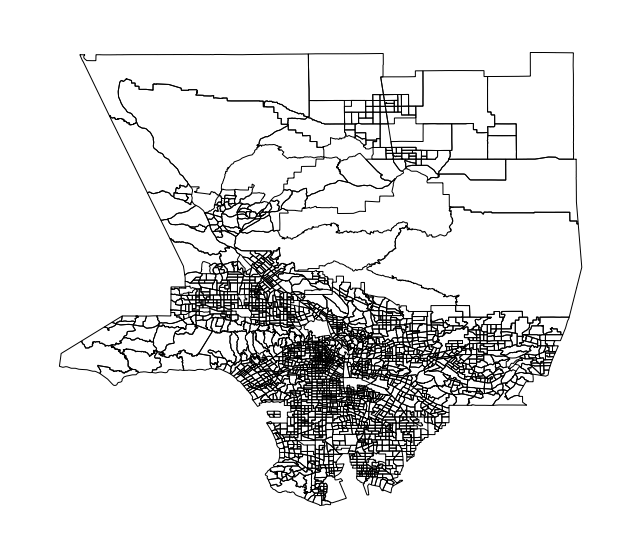

In [10]:
#Basic outline map of tracts in LA County:

geoplot.polyplot(typology_maps, figsize=(14,10))

plt.show()

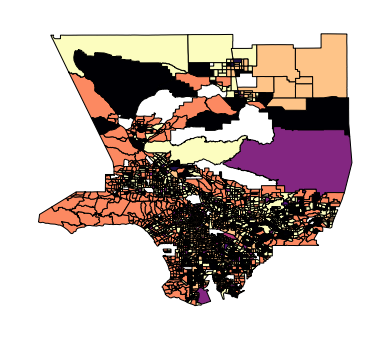

In [11]:
#Choropleth map of displacement typologies across LA County:

ax = geoplot.choropleth(typology_maps, hue = 'typ_cat', cmap = 'magma')

## 2. Adding Completed Joint Development Sites to the Typology Map

After processing the LEHD datasets showing all jobs held by workers residing in the 0.1-mile radii around completed joint developments, I overlaid my basic outline map with the lat/lon coordinates of the sites for a broad look at where they are located in the context of Los Angeles County. The majority of these completed projects are clustered in Downtown Los Angeles, Pasadena, and along the Red Line through Hollywood. 

In [12]:
#Load CSV containing lat/lon coordinates of completed JD projects, along with % change in 
#job growth data (to be used in future visualizations)

lehd_data = pd.read_csv('LEHD_coords.csv')

lehd_data.describe()

,Lon,Lat,Total Jobs Percent Change
count,9.000000,9.000000,9.000000
mean,-118.278558,34.087136,8.648889
std,0.056661,0.028207,24.890815
min,-118.326118,34.056314,-0.140000
25%,-118.308833,34.062301,-0.020000
50%,-118.290864,34.095794,0.090000
75%,-118.274689,34.101069,0.960000
max,-118.147938,34.141556,75.000000


In [13]:
lehd_data.head()

,Site,Lon,Lat,Total Jobs Percent Change
0,Del Mar,-118.147938,34.141556,0.10
1,Hollywood Vine Apartments,-118.326118,34.100243,1.92
2,Hollywood Vine Hotel Condos,-118.325789,34.101069,0.96
3,Hollywood Western,-118.308833,34.101460,-0.02
4,Taylor Yard,-118.233774,34.095794,-0.07


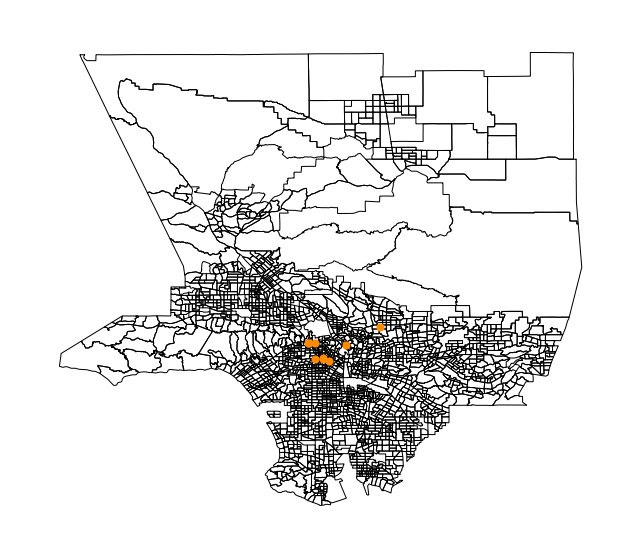

In [14]:
#Plot outline of Los Angeles County tracts with Completed JD Locations

ax = geoplot.polyplot(typology_maps, figsize=(14,10))


lehd = plt.scatter(lehd_data.Lon, lehd_data.Lat, c = 'darkorange', s = 50)

## 3. Comparing Trends in Employment Growth between Joint Development Sites, their Surrounding Neighborhoods, and the County

I conducted this analysis on a final set of 9 development sites. These sites were constructed at times that aligned well with the LEHD dataset to enable a comparison of job access from 3 years before construction was completed to 3 years after. In the following sections, I will offer a brief description of the offerings at each JD site to accompany data visualizations, made in Seaborn, that demonstrate the job access that these sites have (or haven't) brought to their new residents compared to the surrounding area.

#### The first line plot below shows the total number of jobs held by residents of the 0.1-mile buffer zones around each development site. Each line represents total jobs from "Year -3" to "Year 3", with "Year 0" indicating the year when construction was completed. Please note that each development has its own unique 7-year period: "Year -3" is NOT the same year for each site!

This plot shows a variety of job growth patterns. Some sites, like Hollywood/Western and the Wilshire/Vermont Apartments, present a consistent or zigzag pattern of job change that seems unrelated to the JD completion. Most of the others show a discernible spike in job growth after Year 0, suggesting that the new residents of the developments have been able to access job opportunities in the region. In one more extreme example - the Wilshire/Vermont School - the number of jobs spiked from approximately 0 to 152 at Year 3.

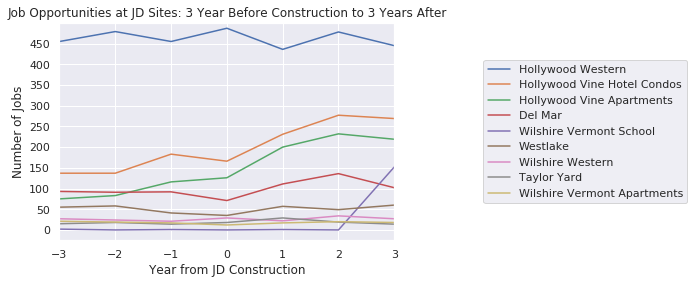

In [15]:
#Line plot of total job growth for residents within 0.1-mile buffer zones of
#completed JD sites: from Year -3 to Year 3

import seaborn as sns
sns.set() 

lehd_data_chart = pd.read_csv('LEHD_for_line_chart.csv')

lehd_data_chart.head()

ax = sns.lineplot(x = 'Year', y ='Hollywood Western', data = lehd_data_chart, label = 'Hollywood Western')
ax = sns.lineplot(x = 'Year', y ='Hollywood Vine Hotel Condos', data = lehd_data_chart, label = 'Hollywood Vine Hotel Condos')
ax = sns.lineplot(x = 'Year', y ='Hollywood Vine Apartments', data = lehd_data_chart, label = 'Hollywood Vine Apartments')
ax = sns.lineplot(x = 'Year', y ='Del Mar', data = lehd_data_chart,label = 'Del Mar')
ax = sns.lineplot(x = 'Year', y ='Wilshire Vermont School', data = lehd_data_chart, label = 'Wilshire Vermont School')
ax = sns.lineplot(x = 'Year', y ='Westlake', data = lehd_data_chart, label = 'Westlake')
ax = sns.lineplot(x = 'Year', y ='Wilshire Western', data = lehd_data_chart, label = 'Wilshire Western')
ax = sns.lineplot(x = 'Year', y ='Taylor Yard', data = lehd_data_chart, label = 'Taylor Yard')
ax = sns.lineplot(x = 'Year', y ='Wilshire Vermont Apartments', data = lehd_data_chart, label = 'Wilshire Vermont Apartments')

ax.set_xlim(-3,3)
ax.set_ylim(-25,500)
ax.set_xlabel('Year from JD Construction')
ax.set_ylabel('Number of Jobs')
ax.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450])
ax.set_title('Job Opportunities at JD Sites: 3 Year Before Construction to 3 Years After')
ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()

#### The next visualization, a bar plot, shows the total percent change in employment for residents of the 0.1-mile buffer zones from Year -3 to Year +3 for each joint development. Because the Wilshire Vermont School exhibits a sudden 7,500% increase in growth at Year 3, it has been omitted to ensure visibility of all other job growth trends in the plot. 

This plot shows that four developments - Del Mar, Hollywood/Vine Apartments, Hollywood/Vine Hotel Condos, and Westlake/Macarthur Park - have demonstrated modest job growth of up to about 2% between Year -3 and Year 3, along with the omitted Wilshire/Vermont School spike in job growth by 7,500%. Three sites have shown very small percent decreases in total jobs, while one exhibited no change over this period. Overall, it appears that completed joint development projects bring more positive change in job access than negative, but the effects are small.

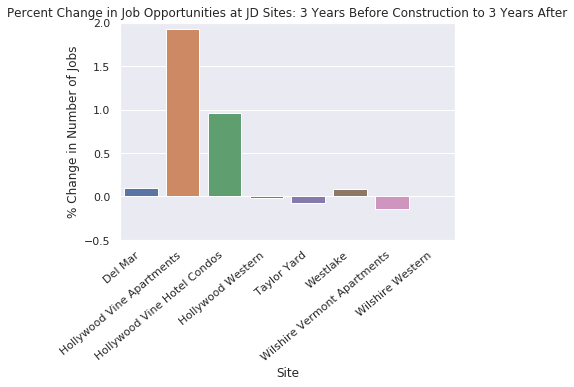

In [16]:
#Bar plot of % change in jobs from Year -3 to Year 3 (excluding Wilshire/Vermont School)

todrop = lehd_data[lehd_data['Site'] == 'Wilshire Vermont School'].index
lehd_no_outlier = lehd_data.drop(todrop)
ax = sns.barplot(x='Site', y = 'Total Jobs Percent Change', data = lehd_no_outlier)

ax.set_title("Percent Change in Job Opportunities at JD Sites: 3 Years Before Construction to 3 Years After")
ax.set_ylim(-0.5,2)
ax.set_xlabel('Site')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_ylabel('% Change in Number of Jobs')
plt.show()

#### I next turned to LEHD data from the Census tracts encompassing my set of joint developments, and from Los Angeles County as a whole, to broaden the scope of my findings on job access at these sites. The next two plots show job growth trends first for the county on its own, then comparing all relevant tracts.

Between 2004 and 2017, Los Angeles County saw rising employment numbers up until 2007, then plummeted in the aftermath of the mortgage crisis before rebounding steadily between 2012 and 2016.

Many of the Census tracts containing completed joint development sites witnessed employment spikes in 2007, 2009, and 2011, exhibiting a variety of peaks and troughs in job growth over this period.

Please note that I excluded the Westlake/Macarthur Park tract from the second plot; since its job values were significantly lower than the others, with growth from 430 to 620 jobs over this period, omitting it made the visualization clearer.

In [17]:
#Import data from sites, tracts, and the county
tract_county_site = pd.read_csv('LEHD_with_tracts_county.csv')

tract_county_site.head()

,Year,Del Mar,Percent_Del Mar,Hollywood Vine Apartments,Percent_HVA,Hollywood Vine Hotel Condos,Percent_HVHC,Hollywood Western,Percent_HW,Taylor Yard,...,Tract 1871.02,Percent_1871,Tract 2089.02,Percent_2089,Tract 2111.20,Percent_2111,Tract 2118.02,Percent_2118,Los Angeles County,Percent_county
0,2004,93.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1460,0.000000,430,0.000000,1606,0.000000,1463,0.000000,3821482,0.000000
1,2005,91.0,-0.021505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1471,0.007534,372,-0.134884,1571,-0.021793,1463,0.000000,3907255,0.022445
2,2006,92.0,0.010989,NaN,NaN,NaN,NaN,455.0,0.000000,NaN,...,1482,0.007478,418,0.123656,1620,0.031190,1491,0.019139,3959562,0.013387
3,2007,71.0,-0.228261,75.0,0.000000,137.0,0.0,479.0,0.052747,NaN,...,1741,0.174764,437,0.045455,1700,0.049383,1489,-0.001341,4032931,0.018530
4,2008,111.0,0.563380,83.0,0.106667,137.0,0.0,455.0,-0.050104,NaN,...,1489,-0.144744,458,0.048055,1704,0.002353,1565,0.051041,4005299,-0.006852


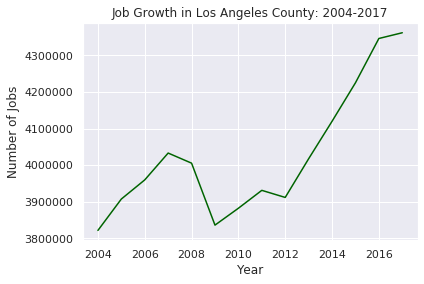

In [18]:
#Total job growth in Los Angeles County as a whole:

ax = sns.lineplot(x = 'Year', y ='Los Angeles County', data = tract_county_site, color = 'darkgreen')


ax.set_title("Job Growth in Los Angeles County: 2004-2017")
ax.set_xlabel('Year')
ax.set_ylabel('Number of Jobs')



plt.show()

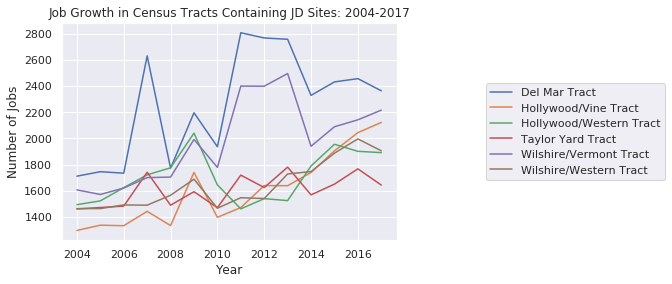

In [19]:
#Comparing tracts containing JD sites (excluding Westlake):

ax = sns.lineplot(x = 'Year', y ='Tract 4636.02', data = tract_county_site, label = "Del Mar Tract")
ax = sns.lineplot(x = 'Year', y ='Tract 1910.00', data = tract_county_site, label = "Hollywood/Vine Tract")
ax = sns.lineplot(x = 'Year', y ='Tract 1905.10', data = tract_county_site, label = "Hollywood/Western Tract")
ax = sns.lineplot(x = 'Year', y ='Tract 1871.02', data = tract_county_site, label = "Taylor Yard Tract")
ax = sns.lineplot(x = 'Year', y ='Tract 2111.20', data = tract_county_site, label = "Wilshire/Vermont Tract")
ax = sns.lineplot(x = 'Year', y ='Tract 2118.02', data = tract_county_site, label = "Wilshire/Western Tract")


ax.set_xlabel('Year')
ax.set_ylabel('Number of Jobs')
ax.set_title('Job Growth in Census Tracts Containing JD Sites: 2004-2017')
ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()

#### This final series of plots takes one joint development site (or cluster of sites in the same tract) at a time to compare year-over-year change in employment for residents of the 0.1-mile buffer zones around the developments, the surrounding tract, and Los Angeles County. For each comparison, I offer a description of the local context and preliminary observations on the trends that these plots demonstrate.

The first plot shows Del Mar, a joint development that includes 347 apartments (21 affordable), 11,000 sq. ft. retail space, and 600 dedicated transit parking spaces. It is located along the Gold Line in Pasadena and was completed in 2007. Over the period shown, the site witnessed growth in employment in 2008, even as jobs plummeted at the tract level.

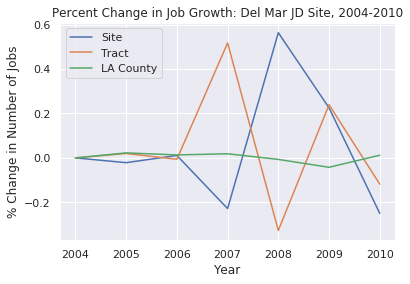

In [20]:
#Del Mar:

DelMar_data = tract_county_site.loc[tract_county_site.Year < 2011]
DelMar_data.tail()

ax = sns.lineplot(x = 'Year', y ='Percent_Del Mar', data = DelMar_data, label = "Site")
ax = sns.lineplot(x = 'Year', y ='Percent_4636', data = DelMar_data, label = "Tract")
ax = sns.lineplot(x = 'Year', y ='Percent_county', data = DelMar_data, label = "LA County")


ax.set_xlabel('Year')
ax.set_ylabel('% Change in Number of Jobs')
ax.set_title('Percent Change in Job Growth: Del Mar JD Site, 2004-2010')
plt.show()

The Hollywood/Vine location includes two development sites: the Hollywood/Vine Apartments, which include 375 apartments (78 affordable) and 28,000 sq. ft. retail space, and the Hollywood/Vine Hotel Condos, including a 305-room Hotel, 143 condominiums, 31,000 sq. ft. retail space, improved public plaza and second subway elevator, and a new subway portal canopy and bike room. Both were completed in 2010. They show similar patterns of job growth and decline to the tract encompassing them.

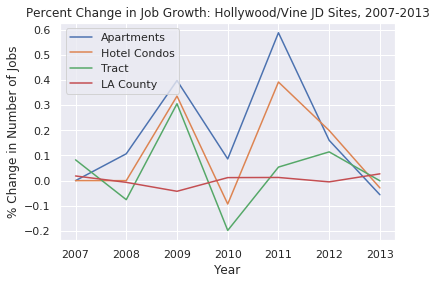

In [21]:
#Hollywood/Vine (two sites):

HV_data = tract_county_site.loc[(tract_county_site.Year > 2006) & (tract_county_site.Year < 2014)]
HV_data.tail()

ax = sns.lineplot(x = 'Year', y ='Percent_HVA', data = HV_data, label = "Apartments")
ax = sns.lineplot(x = 'Year', y ='Percent_HVHC', data = HV_data, label = "Hotel Condos")
ax = sns.lineplot(x = 'Year', y ='Percent_1910', data = HV_data, label = "Tract")
ax = sns.lineplot(x = 'Year', y ='Percent_county', data = HV_data, label = "LA County")


ax.set_xlabel('Year')
ax.set_ylabel('% Change in Number of Jobs')
ax.set_title('Percent Change in Job Growth: Hollywood/Vine JD Sites, 2007-2013')
plt.show()

The Hollywood/Western development, located near its Hollywood/Vine counterparts along the Red Line, offers 60 affordable apartments, 9,000 sq. ft. retail space, and a 4,000 sq. ft. childcare facility and was completed in 2009. It also experienced similar employment trends to its surrounding Census tract.

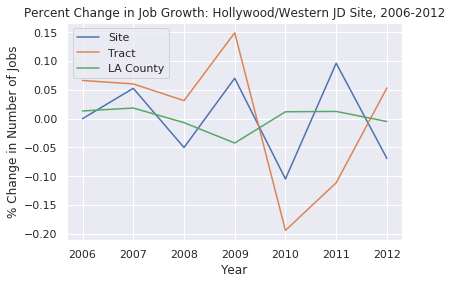

In [22]:
#Hollywood/Western:

HW_data = tract_county_site.loc[(tract_county_site.Year > 2005) & (tract_county_site.Year < 2013)]
HW_data.tail()

ax = sns.lineplot(x = 'Year', y ='Percent_HW', data = HW_data, label = "Site")
ax = sns.lineplot(x = 'Year', y ='Percent_1905', data = HW_data, label = "Tract")
ax = sns.lineplot(x = 'Year', y ='Percent_county', data = HW_data, label = "LA County")


ax.set_xlabel('Year')
ax.set_ylabel('% Change in Number of Jobs')
ax.set_title('Percent Change in Job Growth: Hollywood/Western JD Site, 2006-2012')
plt.show()

The Taylor Yard site includes multiple completed developments. For this plot, they have been consolidated here as one site since they are all located directly next to one another in the same Census tract, and only Lots 1 and 3 are shown since data limitations prevent analysis of those that were completed most recently. Lots 1 and 3 collectively offer 156 affordable apartments for families and were both completed in 2014. Compared with their surrounding tract, the site witnessed steady growth between 2013 and 2015 with a sharp decline in 2016.

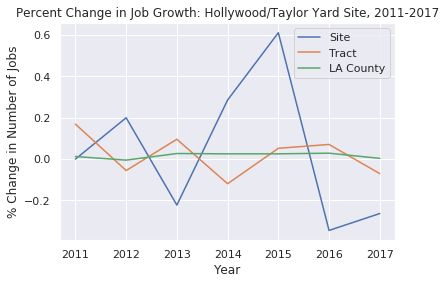

In [23]:
#Taylor Yard (Lots 1 + 3 combined):

Taylor_data = tract_county_site.loc[(tract_county_site.Year > 2010) & (tract_county_site.Year < 2018)]
Taylor_data.tail()

ax = sns.lineplot(x = 'Year', y ='Percent_Taylor', data = Taylor_data, label = "Site")
ax = sns.lineplot(x = 'Year', y ='Percent_1871', data = Taylor_data, label = "Tract")
ax = sns.lineplot(x = 'Year', y ='Percent_county', data = Taylor_data, label = "LA County")


ax.set_xlabel('Year')
ax.set_ylabel('% Change in Number of Jobs')
ax.set_title('Percent Change in Job Growth: Hollywood/Taylor Yard Site, 2011-2017')
plt.show()

The Westlake/Macarthur Park development, located along the Red Line, includes 90 affordable apartments, 15,540 sq. ft. retail space, and 100 dedicated transit parking spaces for "commute period" only and was completed in 2012. It experienced substantial job growth between 2012 and 2013, with a sharp decline in the following year.

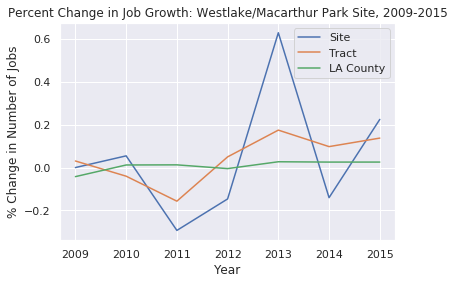

In [24]:
#Westlake/Macarthur Park:

Westlake_data = tract_county_site.loc[(tract_county_site.Year > 2008) & (tract_county_site.Year < 2016)]
Westlake_data.tail()

ax = sns.lineplot(x = 'Year', y ='Percent_Westlake', data = Westlake_data, label = "Site")
ax = sns.lineplot(x = 'Year', y ='Percent_2089', data = Westlake_data, label = "Tract")
ax = sns.lineplot(x = 'Year', y ='Percent_county', data = Westlake_data, label = "LA County")


ax.set_xlabel('Year')
ax.set_ylabel('% Change in Number of Jobs')
ax.set_title('Percent Change in Job Growth: Westlake/Macarthur Park Site, 2009-2015')
plt.show()

The Wilshire/Vermont development includes both apartments and a school; however, the school is excluded here due to its sharp spike from 0 jobs to 152 that made percent change calculations difficult to demonstrate in the plot. The Wilshire/Vermont Apartments, at the intersection of the Red and Purple Lines, offer 449 apartments (90 affordable) and 36,000 sq. ft. retail space and were completed in 2007. They experienced a spike in growth in 2008 while employment declined at the tract level.

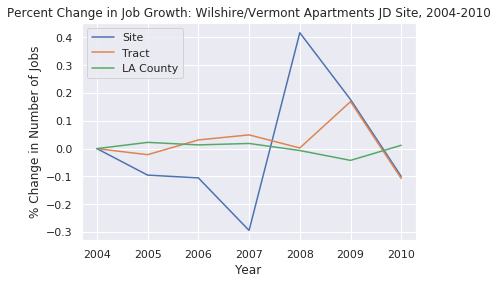

In [25]:
#Wilshire/Vermont (apartments only: school went from ~0 jobs to 152 in last year shown)
#(making percent change difficult to visualize)

WV_data = tract_county_site.loc[(tract_county_site.Year > 2003) & (tract_county_site.Year < 2011)]
WV_data.tail()

ax = sns.lineplot(x = 'Year', y ='Percent_WVA', data = WV_data, label = "Site")
ax = sns.lineplot(x = 'Year', y ='Percent_2111', data = WV_data, label = "Tract")
ax = sns.lineplot(x = 'Year', y ='Percent_county', data = WV_data, label = "LA County")


ax.set_xlabel('Year')
ax.set_ylabel('% Change in Number of Jobs')
ax.set_title('Percent Change in Job Growth: Wilshire/Vermont Apartments JD Site, 2004-2010')
plt.show()

And finally, the Wishire/Western joint development on the Purple Line includes 186 condominiums, 41,000 sq. ft. retail space, and a new bus layover facility and subway portal canopy. It was completed in 2009. Its employment patterns roughly mirror those of its surrounding tract, with growth spikes in 2009 and 2011.

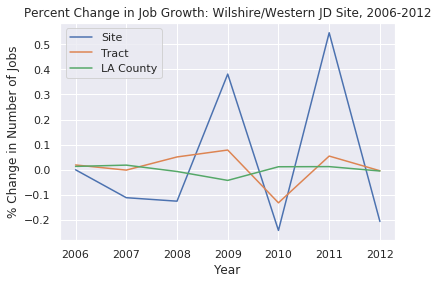

In [26]:
#Wilshire/Western:

WW_data = tract_county_site.loc[(tract_county_site.Year > 2005) & (tract_county_site.Year < 2013)]
WW_data.tail()

ax = sns.lineplot(x = 'Year', y ='Percent_WW', data = WW_data, label = "Site")
ax = sns.lineplot(x = 'Year', y ='Percent_2118', data = WW_data, label = "Tract")
ax = sns.lineplot(x = 'Year', y ='Percent_county', data = WW_data, label = "LA County")


ax.set_xlabel('Year')
ax.set_ylabel('% Change in Number of Jobs')
ax.set_title('Percent Change in Job Growth: Wilshire/Western JD Site, 2006-2012')
plt.show()

### The final analysis will delve further into the implications of these employment trends in the context of neighborhood change and LA Metro's Joint Development program.